In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_csv("BankCustomers.csv")

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 14)

In [14]:
#drop the unwanted column

df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
states = pd.get_dummies(df['Geography'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [18]:
df = pd.concat([df,states,gender],axis = 1)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
df = df.drop(['Geography','Gender'], axis = 1)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [28]:
# Putting feature variable to X
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

Machine learning algorithms like linear regression, logistic regression, neural network, etc. 
that use gradient descent as an optimization technique require data to be scaled. 

Since different features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, 
we do not want our algorithm to be biassed towards one feature.

In [30]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [33]:
#Standardisation has been performed in thsi case

In [34]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

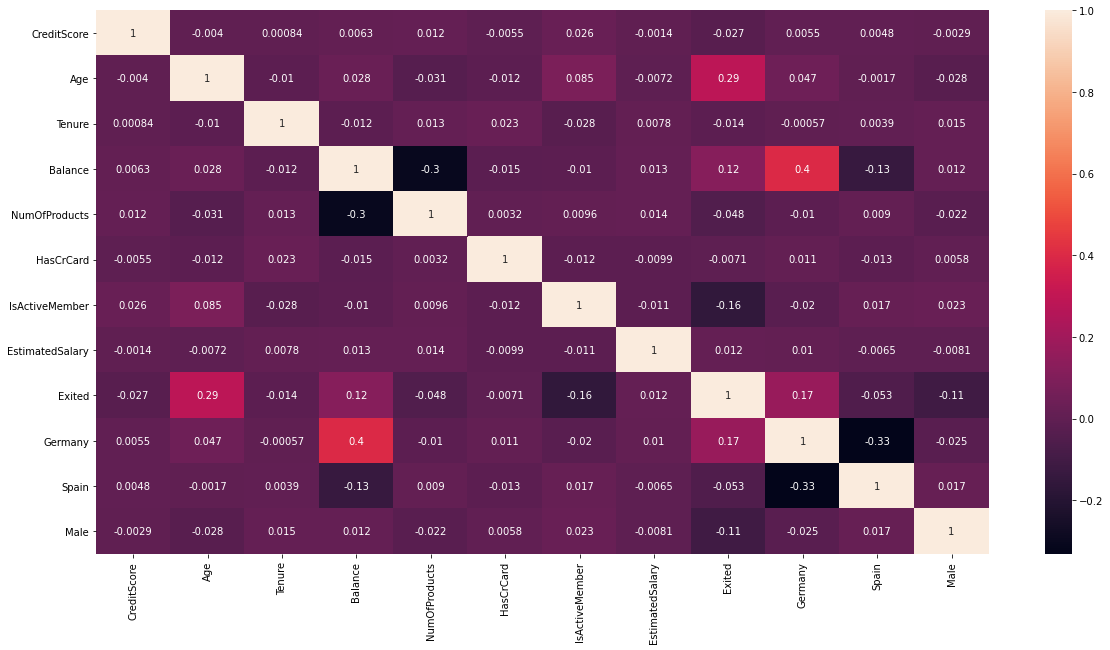

In [35]:
#let us see the correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [36]:
#Running the first logistic reg model
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3432.0
Date:                Sat, 26 Dec 2020   Deviance:                       6864.1
Time:                        19:25:32   Pearson chi2:                 7.93e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6472      0.034    -47.855      0.000      -1.715      -1.580
x1            -0.0724      0.030     -2.390      0.017      -0.132      -0.013
x2             0.7526      0.030     25.037      0.000       0.694       0.811
x3            -0.0814      0.030     -2.694      0.007      -0.141      -0.022
x4             0.1537      0.036      4.283      0.000       0.083       0.224
x5            -0.0848      0.031     -2.747      0.006      -0.145      -0.024
x6            -0.0237      0.030     -0.786      0.432      -0.083       0.035
x7            -0.5189      0.032    -16.205      0.000      -0.582      -0.456
x8             0.0292      0.030      0.960      0.337      -0.030       0.089
x9             0.3563      0.033     10.900      0.000       0.292       0.420
x10            0.0484      0.034      1.435      0.151      -0.018       0.115
x11           -0.2695      0.030     -8.888      0.000      -0.329      -0.210
==============================================================================
"""

In [59]:
col = X_train.columns

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2995.9
Date:                Sat, 26 Dec 2020   Deviance:                       5991.8
Time:                        19:53:19   Pearson chi2:                 6.94e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0221      0.292    -10.338      0.000      -3.595      -2.449
CreditScore        -0.0009      0.000     -2.837      0.005      -0.002      -0.000
Age                 0.0712      0.003     23.118      0.000       0.065       0.077
Tenure             -0.0289      0.011     -2.581      0.010      -0.051      -0.007
Balance          2.541e-06   6.14e-07      4.136      0.000    1.34e-06    3.74e-06
NumOfProducts      -0.1882      0.058     -3.263      0.001      -0.301      -0.075
HasCrCard          -0.0323      0.071     -0.454      0.650      -0.172       0.107
IsActiveMember     -0.9982      0.068    -14.580      0.000      -1.132      -0.864
EstimatedSalary   6.33e-07   5.66e-07      1.119      0.263   -4.76e-07    1.74e-06
Germany             0.8189      0.081     10.066      0.000       0.659       0.978
Spain               0.0977      0.084      1.162      0.245      -0.067       0.262
Male               -0.5306      0.065     -8.137      0.000      -0.658      -0.403
===================================================================================
"""

In [61]:
logm2

In [62]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7681    0.053696
9031    0.131480
3691    0.714068
202     0.164721
5625    0.448231
298     0.344010
5135    0.071515
6899    0.601187
7258    0.776028
9516    0.098001
dtype: float64

when using stats model api we will get the probabiloty values of 0's and 1's 
however using logistic regression from sklearn will give us the values

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2316   63]
 [ 585   36]]


In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
#The result is telling us that we have 2316+36 correct predictions and 585+63 incorrect predictions.

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2379
           1       0.36      0.06      0.10       621

    accuracy                           0.78      3000
   macro avg       0.58      0.52      0.49      3000
weighted avg       0.71      0.78      0.72      3000



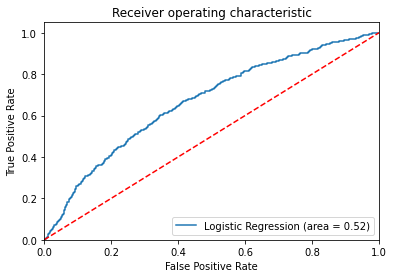

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [66]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Training the ANN Model

In [67]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [68]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
import keras


Using TensorFlow backend.
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [71]:
#Initialising the ANN

classfier = Sequential()
classfier

In [73]:
#Adding the input layer and the first hidden layer

classfier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation ='relu', input_dim = 11))

In [74]:
#Adding the second hidden layer

classfier.add(Dense(activation = "relu", units=6, kernel_initializer="he_uniform"))

In [75]:
#Adding the output layer

classfier.add(Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform"))

In [77]:
#Compiling the ANN

classfier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics =['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [78]:
#Fitting the ANN to the Training set
model_history=classfier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 527us/step - loss: 0.5282 - accuracy: 0.7888 - val_loss: 0.5057 - val_accuracy: 0.7887
Epoch 2/100
5359/5359 [==============================] - 1s 244us/step - loss: 0.4583 - accuracy: 0.8009 - val_loss: 0.4743 - val_accuracy: 0.7902
Epoch 3/100
5359/5359 [==============================] - 1s 237us/step - loss: 0.4333 - accuracy: 0.8059 - val_loss: 0.4590 - val_accuracy: 0.7948
Epoch 4/100
5359/5359 [==============================] - 1s 237us/step - loss: 0.4216 - accuracy: 0.8123 - val_loss: 0.4523 - val_accuracy: 0.7989
Epoch 5/100
5359/5359 [==============================] - 2s 347us/step - loss: 0.4134 - accuracy: 0.8169 - val_loss: 0.4460 - val_accuracy: 0.8073
Epoch 6/100
5359/5359 [==============================] - 1s 238us/step - loss: 0.4086 - accuracy: 0.8214 - val_loss: 0.4457 - val_accuracy: 0.8050
Epoch 7/100
5359/5359 [==============================] - 1s 225us/ste

Epoch 55/100
5359/5359 [==============================] - 1s 250us/step - loss: 0.3326 - accuracy: 0.8651 - val_loss: 0.3546 - val_accuracy: 0.8557
Epoch 56/100
5359/5359 [==============================] - 1s 224us/step - loss: 0.3323 - accuracy: 0.8647 - val_loss: 0.3584 - val_accuracy: 0.8584
Epoch 57/100
5359/5359 [==============================] - 1s 218us/step - loss: 0.3329 - accuracy: 0.8673 - val_loss: 0.3550 - val_accuracy: 0.8569
Epoch 58/100
5359/5359 [==============================] - 1s 224us/step - loss: 0.3320 - accuracy: 0.8668 - val_loss: 0.3543 - val_accuracy: 0.8573
Epoch 59/100
5359/5359 [==============================] - 2s 317us/step - loss: 0.3315 - accuracy: 0.8645 - val_loss: 0.3521 - val_accuracy: 0.8557
Epoch 60/100
5359/5359 [==============================] - 1s 215us/step - loss: 0.3319 - accuracy: 0.8681 - val_loss: 0.3526 - val_accuracy: 0.8599
Epoch 61/100
5359/5359 [==============================] - 1s 224us/step - loss: 0.3309 - accuracy: 0.8653 - val_

In [79]:
# Predicting the Test set results
y_pred = classfier.predict(X_test)
y_pred = (y_pred > 0.5)

In [80]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [81]:
unique, counts = np.unique(y_pred, return_counts = True)
dict(zip(unique, counts))

{False: 1764, True: 236}

In [82]:
unique, counts = np.unique(y_test, return_counts=True)

dict(zip(unique, counts))

{0: 1588, 1: 412}

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [84]:
cm

array([[1528,   60],
       [ 236,  176]], dtype=int64)

In [86]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score

score=accuracy_score(y_pred,y_test)
score

0.852

In [87]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [89]:
from keras.layers import Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [91]:
model

In [92]:
layers=[(150,), (160,100), (140,100,500)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [93]:
grid_result = grid.fit(X_train, y_train)

In [94]:
[grid_result.best_score_,grid_result.best_params_]


[0.8477499961853028,
 {'activation': 'relu', 'batch_size': 256, 'epochs': 30, 'layers': (160, 100)}]

In [95]:
pred_y = grid.predict(X_test)


In [96]:
pred_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [97]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1588
           1       0.77      0.35      0.48       412

    accuracy                           0.84      2000
   macro avg       0.81      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



The Ann performed better than simple logistic regression model